In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Laser cooling

C:\Users\carmelo\AppData\Local\Temp\ipykernel_19788\2265192992.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  return _q(delta, nu, theta) / (1 - _q(delta, nu, theta))
C:\Users\carmelo\AppData\Local\Temp\ipykernel_19788\2265192992.py:20: RuntimeWarning: divide by zero encountered in divide
  return _q(delta, nu, theta) / (1 - _q(delta, nu, theta))
C:\Users\carmelo\AppData\Local\Temp\ipykernel_19788\2265192992.py:48: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(c, ax=ax1)


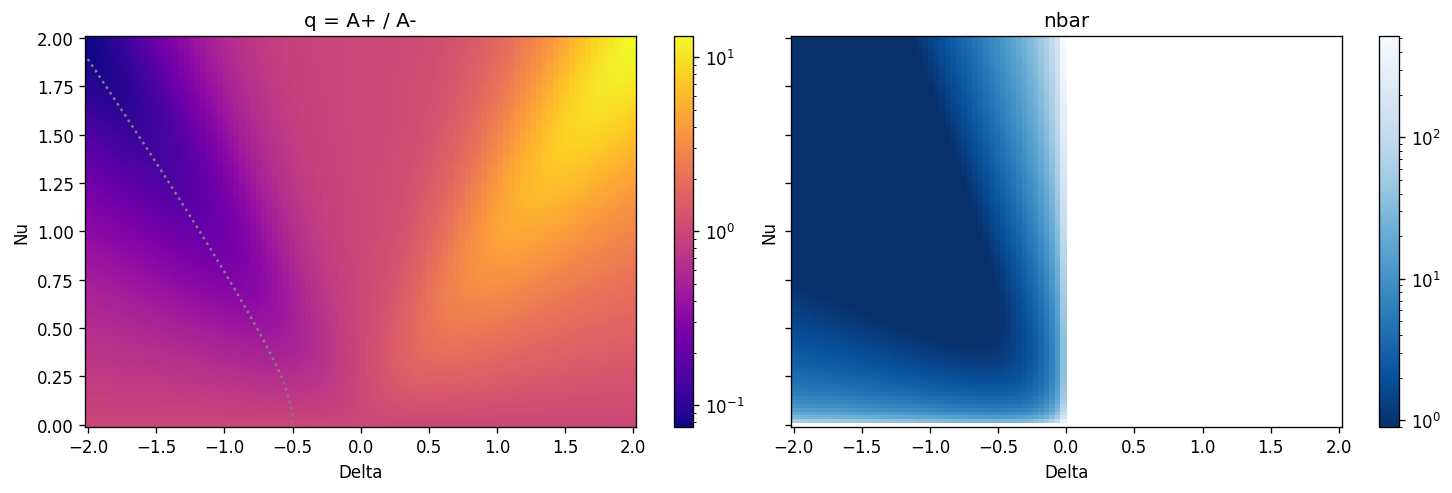

In [2]:
from scipy.optimize import minimize_scalar as minimize

def rho(delta):
    return 1 / (1 + 4 * delta**2)


def _A_minus(delta, nu, theta):
    return np.cos(theta) ** 2 * rho(delta + nu) + rho(delta)


def _A_plus(delta, nu, theta):
    return np.cos(theta) ** 2 * rho(delta - nu) + rho(delta)


def _q(delta, nu, theta):
    return _A_plus(delta, nu, theta) / _A_minus(delta, nu, theta)


def _nbar(delta, nu, theta):
    return _q(delta, nu, theta) / (1 - _q(delta, nu, theta))


delta = np.linspace(-2, 2, 100)
nu = np.linspace(0, 2, 100)
delta, nu = np.meshgrid(delta, nu)
theta = np.pi / 10

q = _q(delta, nu, theta)

fig, (ax, ax1) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 4), dpi=120, layout="constrained")
c = ax.pcolor(delta, nu, q, cmap="plasma", norm=mcolors.LogNorm())
plt.colorbar(c, ax=ax)
ax.set(
    xlabel="Delta",
    ylabel="Nu",
    title="q = A+ / A-",
)

_nu = np.linspace(0.01, 1.9, 100)
_delta_min = np.empty_like(_nu)
for i, _n in enumerate(_nu):
    _delta_min[i] = minimize(lambda delta: _nbar(delta, _n, theta), bracket=(-2, 0)).x
    
ax.plot(_delta_min, _nu, ":", color="gray", label="q=1")
    
nbar = _nbar(delta, nu, theta)
c = ax1.pcolor(delta, nu, nbar, cmap="Blues_r", norm=mcolors.LogNorm(vmin=0.9))
plt.colorbar(c, ax=ax1)
ax1.set(
    xlabel="Delta",
    ylabel="Nu",
    title="nbar",
);

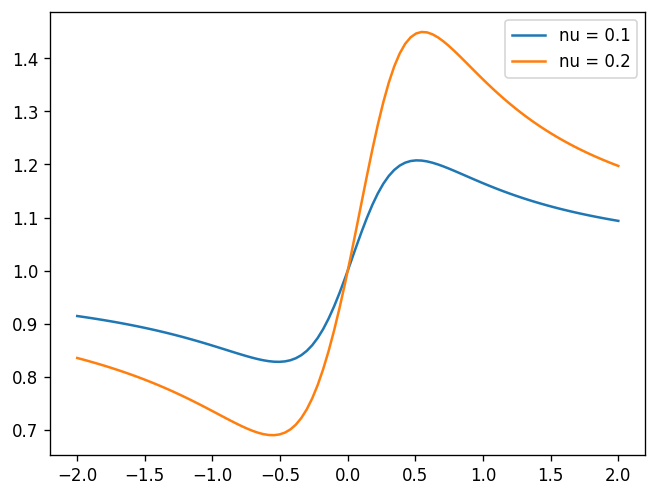

In [3]:
fig, ax = plt.subplots(dpi=120)
delta = np.linspace(-2, 2, 100)
nu = 0.1
theta = np.pi / 10

q = _q(delta, nu, theta)
ax.plot(delta, q, label=f"nu = {nu}")

nu = 0.2
q = _q(delta, nu, theta)
ax.plot(delta, q, label=f"nu = {nu}")

ax.legend()